In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('telcom_data.xlsx')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

## Task 4.1 - Write a Python program to assign
### Task 4.1.1 - Engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

In [4]:
# Engagement analysis

session_frequency = df.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')
Session_Duration = df['Dur. (ms)']
total_traffic = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

df['Session Frequency'] = session_frequency
df['Session Duration'] = Session_Duration
df['Total Traffic'] = total_traffic

# Aggregate the metrics per customer id (MSISDN) and report the top 10 customers per engagement metric
aggregated_data = df.groupby('MSISDN/Number').agg({
    'Session Frequency': 'sum',
    'Session Duration': 'sum',
    'Total Traffic': 'sum',})

aggregated_data

,Session Frequency,Session Duration,Total Traffic
MSISDN/Number,,,
3.360100e+10,1.0,116720.0,8.786906e+08
3.360100e+10,1.0,181230.0,1.568596e+08
3.360100e+10,1.0,134969.0,5.959665e+08
3.360101e+10,1.0,49878.0,4.223207e+08
3.360101e+10,4.0,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1.0,8810.0,7.146416e+08
3.379000e+10,1.0,140988.0,4.803073e+08
3.197021e+12,1.0,877385.0,2.321240e+08


In [5]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
from sklearn.cluster import KMeans
kmeans=KMeans()

user_data = aggregated_data[['Session Frequency', 'Session Duration', 'Total Traffic']].values
model = KMeans(n_clusters = 2,
               max_iter = 1000)
model.fit(user_data)

# Finding the cluster centroids
cluster = model.cluster_centers_

labels = model.labels_

centroids = np.array(cluster)

In [6]:
from sklearn.metrics.pairwise import euclidean_distances

distances = euclidean_distances(user_data, centroids)

less_engaged_cluster_index = 0

engagement_scores = distances[:, less_engaged_cluster_index]

mms = MinMaxScaler()
engagement_scores = mms.fit_transform(engagement_scores.reshape(-1, 1))

aggregated_data['Engagement Score'] = engagement_scores


aggregated_data

,Session Frequency,Session Duration,Total Traffic,Engagement Score
MSISDN/Number,,,,
3.360100e+10,1.0,116720.0,8.786906e+08,0.041462
3.360100e+10,1.0,181230.0,1.568596e+08,0.045373
3.360100e+10,1.0,134969.0,5.959665e+08,0.007448
3.360101e+10,1.0,49878.0,4.223207e+08,0.013437
3.360101e+10,4.0,37104.0,1.457411e+09,0.111085
...,...,...,...,...
3.379000e+10,1.0,8810.0,7.146416e+08,0.021726
3.379000e+10,1.0,140988.0,4.803073e+08,0.006460
3.197021e+12,1.0,877385.0,2.321240e+08,0.036318


#### Task 4.1.2 - Experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster

##### Experience  analysis

In [7]:
# Calculate average TCP retransmission
avg_tcp_retransmission = df.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().mean(axis=1)
avg_tcp_retransmission.fillna(avg_tcp_retransmission.mean(), inplace=True)

# Calculate average RTT
avg_rtt = df.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean().mean(axis=1)
avg_rtt.fillna(avg_rtt.mean(), inplace=True)

# Calculate average throughput
avg_throughput = df.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().mean(axis=1)
avg_throughput.fillna(avg_throughput.mean(), inplace=True)

handset_mode = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode().values[0] if len(x.mode()) > 0 else None)

# Create a new DataFrame with aggregated information
aggregated_data1 = pd.DataFrame({
    'Avg_TCP_Retransmission': avg_tcp_retransmission,
    'Avg_RTT': avg_rtt,
    'Handset_Type': handset_mode,
    'Avg_Throughput': avg_throughput
})

# Reset the index to make 'MSISDN/Number' a column instead of the index
aggregated_data1.reset_index(inplace=True)

# Display the aggregated data
aggregated_data1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput
0,3.360100e+10,8.463363e+06,23.000000,Huawei P20 Lite Huawei Nova 3E,38.0
1,3.360100e+10,8.463363e+06,15.500000,Apple iPhone 7 (A1778),49.5
2,3.360100e+10,8.463363e+06,68.269961,undefined,48.5
3,3.360101e+10,1.066000e+03,42.000000,Apple iPhone 5S (A1457),124.0
4,3.360101e+10,4.685416e+06,29.750000,Apple iPhone Se (A1723),14211.0
...,...,...,...,...,...
106851,3.379000e+10,1.090225e+05,26.000000,Huawei Honor 9 Lite,5182.5
106852,3.379000e+10,8.463363e+06,20.000000,Apple iPhone 8 Plus (A1897),58.0
106853,3.197021e+12,8.463363e+06,68.269961,Quectel Wireless. Quectel Ec25-E,0.5
106854,3.370000e+14,8.463363e+06,68.269961,Huawei B525S-23A,16.5


In [8]:
aggregated_data1['Avg_TCP_Retransmission']=mms.fit_transform(aggregated_data1[['Avg_TCP_Retransmission']])
aggregated_data1['Avg_RTT']=mms.fit_transform(aggregated_data1[['Avg_RTT']])
aggregated_data1['Avg_Throughput']=mms.fit_transform(aggregated_data1[['Avg_Throughput']])


user_data1 = aggregated_data1[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']].values

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2,
               max_iter = 1000)
model.fit(user_data1)

# Finding the cluster centroids
cluster1 = model.cluster_centers_
labels1 = model.labels_
centroids= np.array(cluster1)

cluster_centroids = centroids

distances = euclidean_distances(user_data1, cluster_centroids)

worst_experience_cluster_index = cluster_centroids.shape[0] - 1

experience_scores = distances[:, worst_experience_cluster_index]

mms = MinMaxScaler()
experience_scores = mms.fit_transform(experience_scores.reshape(-1, 1))

aggregated_data1['Experience Score'] = experience_scores

aggregated_data1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput,Experience Score
0,3.360100e+10,2.725529e-03,0.000475,Huawei P20 Lite Huawei Nova 3E,0.000268,0.014261
1,3.360100e+10,2.725529e-03,0.000320,Apple iPhone 7 (A1778),0.000349,0.014193
2,3.360100e+10,2.725529e-03,0.001409,undefined,0.000342,0.014156
3,3.360101e+10,3.426491e-07,0.000867,Apple iPhone 5S (A1457),0.000873,0.013762
4,3.360101e+10,1.508884e-03,0.000614,Apple iPhone Se (A1723),0.100102,0.082669
...,...,...,...,...,...,...
106851,3.379000e+10,3.510881e-05,0.000537,Huawei Honor 9 Lite,0.036505,0.020141
106852,3.379000e+10,2.725529e-03,0.000413,Apple iPhone 8 Plus (A1897),0.000409,0.014127
106853,3.197021e+12,2.725529e-03,0.001409,Quectel Wireless. Quectel Ec25-E,0.000004,0.014488
106854,3.370000e+14,2.725529e-03,0.001409,Huawei B525S-23A,0.000116,0.014378


### Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [9]:
df1 = pd.DataFrame({
    'MSISDN/Number': aggregated_data.index,
    'Engagement Score': aggregated_data['Engagement Score']
})

df1 = df1.reset_index(drop=True)

df1['Experience Score'] = experience_scores
df1['Satisfaction Score'] = (df1['Engagement Score'] + df1['Experience Score']) / 2
df1['Satisfaction Score']

0         0.027861
1         0.029783
2         0.010802
3         0.013599
4         0.096877
            ...   
106851    0.020933
106852    0.010294
106853    0.025403
106854    0.010932
106855    0.030994
Name: Satisfaction Score, Length: 106856, dtype: float64

In [10]:
top_10_satisfied_customers = df1.sort_values(by='Satisfaction Score', ascending=False).head(10)
print(top_10_satisfied_customers)

       MSISDN/Number  Engagement Score  Experience Score  Satisfaction Score
6437    3.361489e+10          1.000000          0.071100            0.535550
47983   3.366232e+10          0.035009          0.982786            0.508897
60763   3.366566e+10          0.111395          0.903876            0.507636
33226   3.365889e+10          0.003329          1.000000            0.501665
92923   3.376054e+10          0.960124          0.026957            0.493541
13180   3.362578e+10          0.958303          0.026718            0.492511
37838   3.365991e+10          0.014389          0.968928            0.491659
69910   3.366871e+10          0.217163          0.712866            0.465015
49595   3.366268e+10          0.018910          0.905777            0.462344
76363   3.367588e+10          0.885094          0.031192            0.458143


### Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df1[['Engagement Score', 'Experience Score']]
y = df1['Satisfaction Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred

array([0.01284745, 0.01186964, 0.02350619, ..., 0.090882  , 0.09047301,
       0.15799455])

In [13]:
y_test

64473    0.012847
83243    0.011870
39296    0.023506
44869    0.206545
99282    0.012083
           ...   
67669    0.068895
63720    0.012437
16701    0.090882
44897    0.090473
97963    0.157995
Name: Satisfaction Score, Length: 21372, dtype: float64

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2.8481781098195316e-32


In [15]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.0673561630913877e-16


In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 1.0


### Task 4.4 - Run a k-means (k=2) on the engagement & the experience score

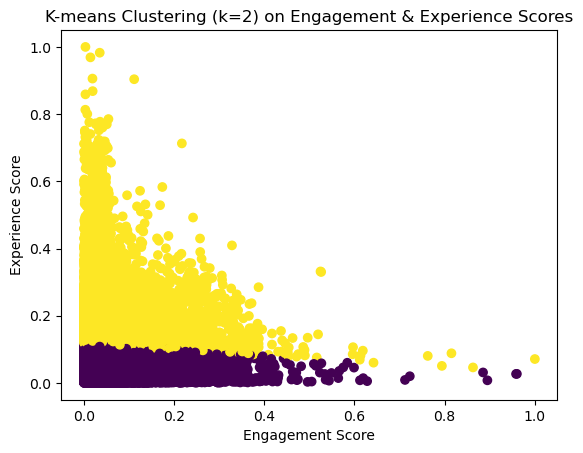

In [17]:
from sklearn.cluster import KMeans

# Prepare the data for clustering
df2 = df1[['Engagement Score', 'Experience Score']]
X = df2.values

# Run K-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-means Clustering (k=2) on Engagement & Experience Scores')
plt.show()

### Task 4.5 - Aggregate the average satisfaction & experience score per cluster

In [18]:
# Create a new DataFrame with cluster labels and satisfaction/experience scores
cluster_data = pd.DataFrame({'Cluster': cluster_labels, 'Satisfaction Score': df1['Satisfaction Score'], 'Experience Score': df1['Experience Score']})

# Calculate the average satisfaction and experience score per cluster
cluster_agg = cluster_data.groupby('Cluster').mean()

cluster_agg

,Satisfaction Score,Experience Score
Cluster,,
0,0.031562,0.023768
1,0.127256,0.200027


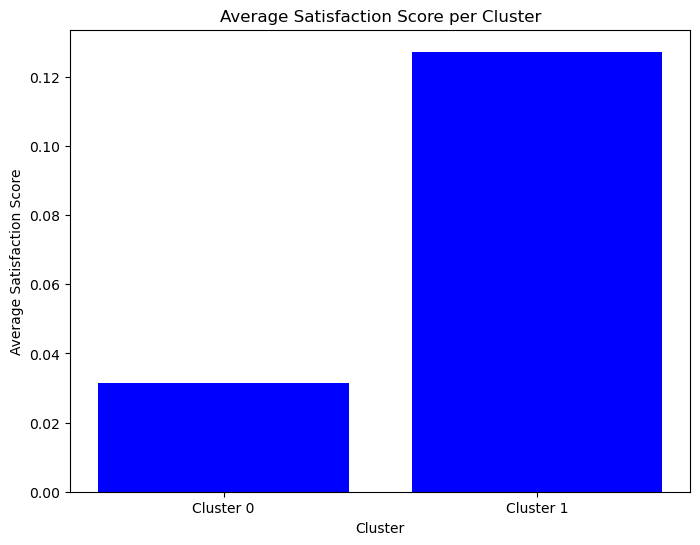

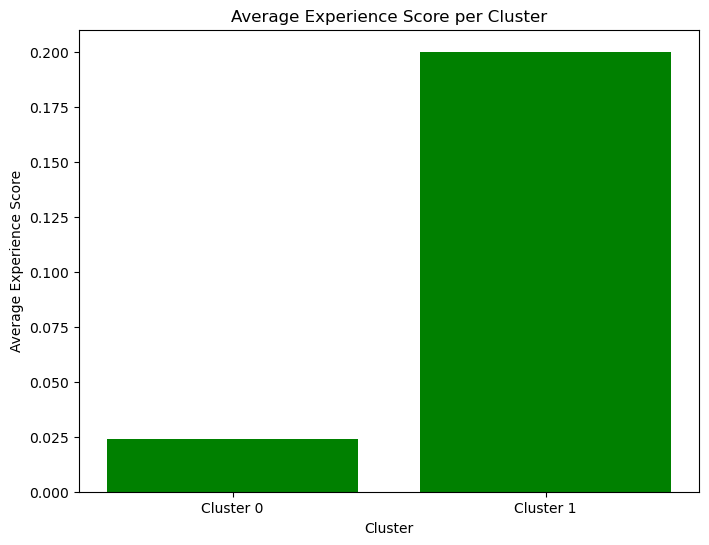

In [19]:
# Define the cluster labels and average scores
cluster_labels = ['Cluster 0', 'Cluster 1']
avg_satisfaction_scores = cluster_agg['Satisfaction Score']
avg_experience_scores =cluster_agg['Experience Score']

# Plot the average satisfaction scores
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, avg_satisfaction_scores, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score per Cluster')

# Display the plot
plt.show()

# Plot the average experience scores
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, avg_experience_scores, color='green')
plt.xlabel('Cluster')
plt.ylabel('Average Experience Score')
plt.title('Average Experience Score per Cluster')

# Display the plot
plt.show()